# Assignment on KNN_Zoo_Data

In [1]:
# KNN Classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score,train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo=pd.read_csv("Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Since we want to use the information in both of these datasets, we can merge them along a common column, the class_type and Class_Number columns.

In [3]:
## Changing Animal name to categorical variable
zoo['animal name'] = zoo['animal name'].astype('category')

# Exploratory Data Analysis

In [4]:
zoo.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

We have no missing data so all the entries are valid for use.

Now we can check the column names to get a better understanding of what features we will be basing our classification on.

In [5]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [6]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   animal name  101 non-null    category
 1   hair         101 non-null    int64   
 2   feathers     101 non-null    int64   
 3   eggs         101 non-null    int64   
 4   milk         101 non-null    int64   
 5   airborne     101 non-null    int64   
 6   aquatic      101 non-null    int64   
 7   predator     101 non-null    int64   
 8   toothed      101 non-null    int64   
 9   backbone     101 non-null    int64   
 10  breathes     101 non-null    int64   
 11  venomous     101 non-null    int64   
 12  fins         101 non-null    int64   
 13  legs         101 non-null    int64   
 14  tail         101 non-null    int64   
 15  domestic     101 non-null    int64   
 16  catsize      101 non-null    int64   
 17  type         101 non-null    int64   
dtypes: category(1), int64(17)
memo

In [7]:
zoo.shape

(101, 18)

In [8]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [9]:
#check if there are duplicates in animal_name
duplicates = zoo['animal name'].value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal name, dtype: int64

In [10]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [11]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


From this we can see that all of the animal characteristics or feature values are given as binary values (1- present / 0-absent) except for the legs where it is given as a count of legs.

We need to keep this in mind going forward while using the data.

In [12]:
features = ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type']

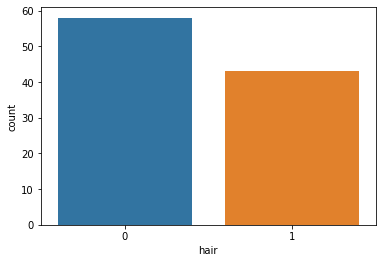

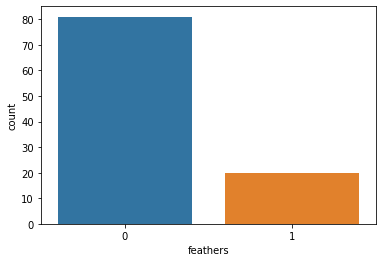

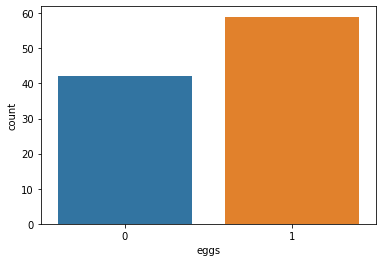

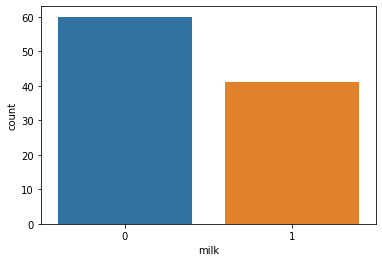

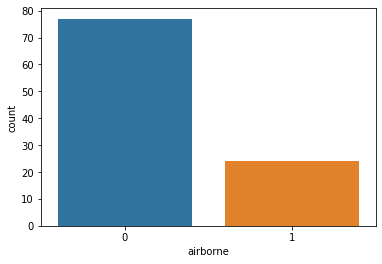

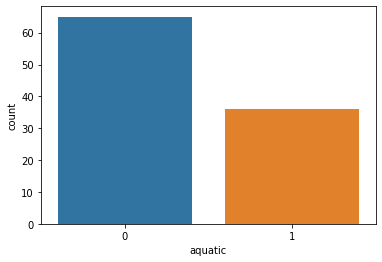

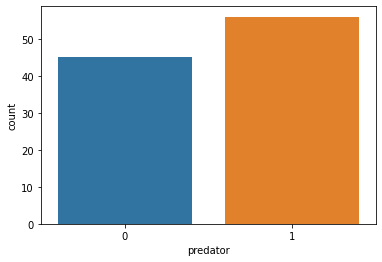

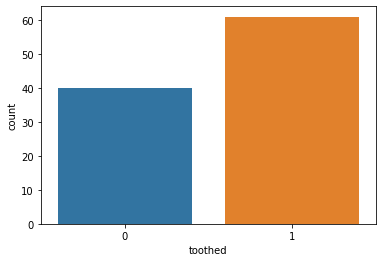

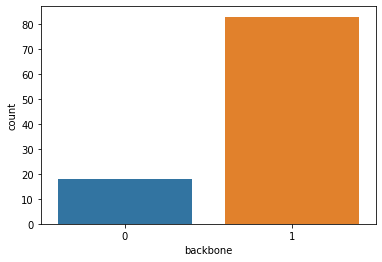

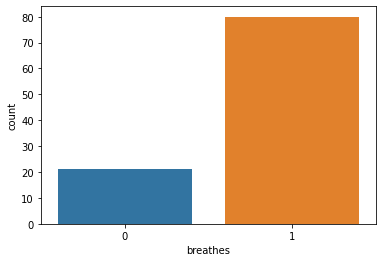

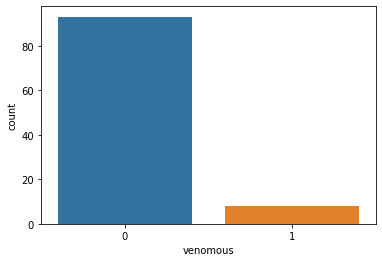

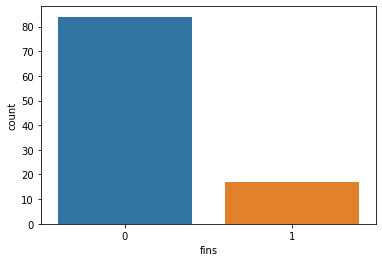

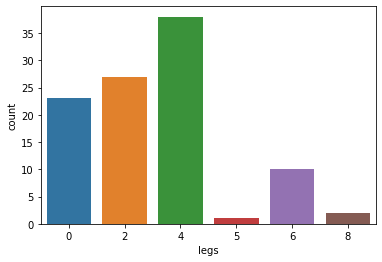

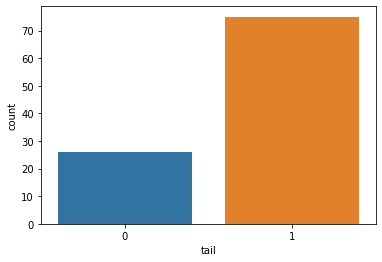

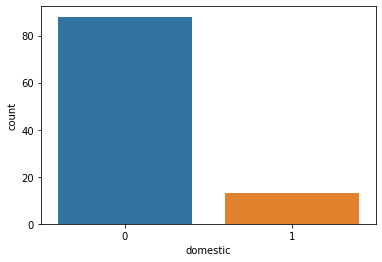

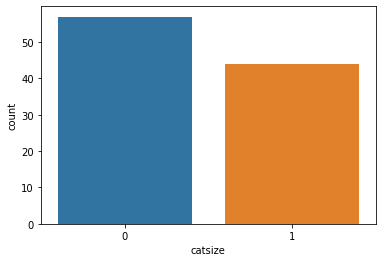

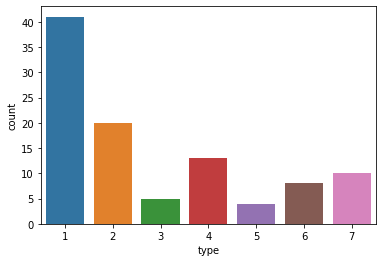

In [13]:
for feature in features:
    sns.countplot(zoo[feature])
    plt.show()

this gives us a very good idea what animals feature and which have what specific counts of what animal feature they have.

In [148]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


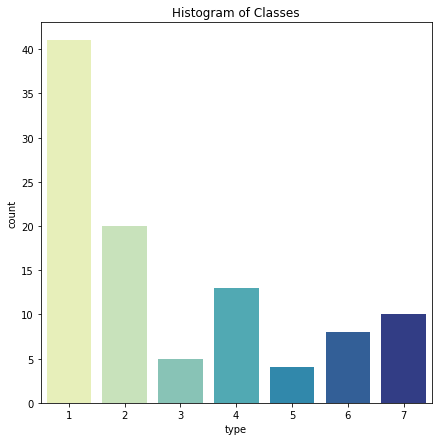

In [116]:
# Plot histogram of classes
plt.rcParams['figure.figsize'] = (7,7)
sns.countplot(zoo['type'], palette='YlGnBu')
ax = plt.gca()
ax.set_title("Histogram of Classes");

We can also see if there are any trends or correlations in the data using a heatmap.

Text(0.5, 1.0, 'Features for the Animals')

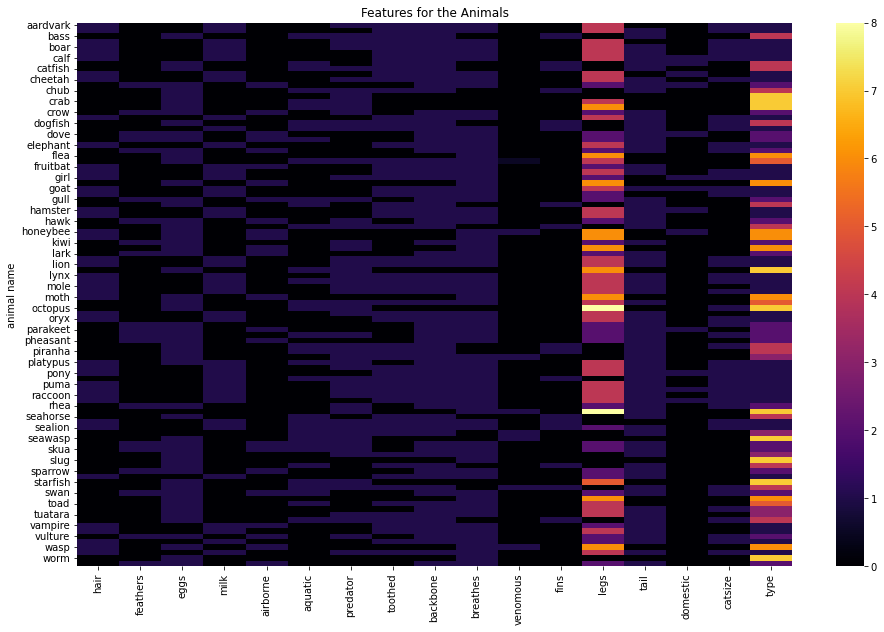

In [126]:
zoo_df_temp = zoo.groupby(by='animal name').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, cmap="inferno")
ax = plt.gca()
ax.set_title("Features for the Animals")

A Heatmap (or heat map) is a type of data visualization that displays aggregated information in a visually appealing way. User interaction on a website such as clicks/taps, scrolls, mouse movements, etc. create heatmaps. To get the most useful insight the activity is then scaled (least to most).

Here we got to know about the correlation of features to the specific animals, the most correlation was found with animals having legs the highest was the octopus which is a relevant answer

Text(0.5, 1.0, 'Types of Features')

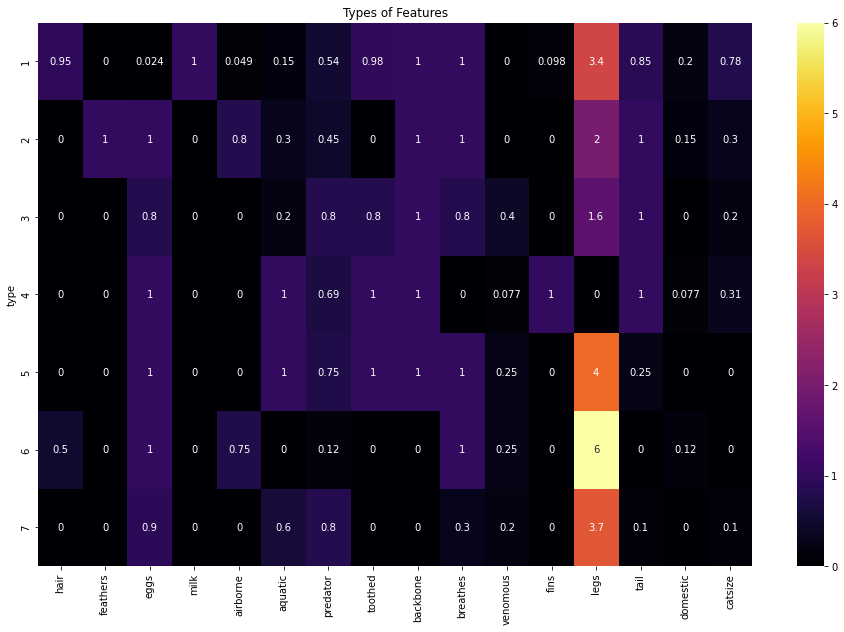

In [235]:
zoo_df_temp = zoo.groupby(by='type').mean()
plt.rcParams['figure.figsize'] = (16,10) 
sns.heatmap(zoo_df_temp, annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("Types of Features")

This heat map shows that the type 6 animals have the maximum legs which are mentioned below but since its the average of type category we dont see the octopus with eight legs outshine here but since type 7 category has different values the mean of all values is in the type 7 category

In [217]:
zoo[zoo['type']==6]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
88,termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6


In [225]:
zoo[zoo['type']==7]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
13,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
14,crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7
77,seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


# Split Train and Test 

In [236]:
from sklearn.model_selection import train_test_split
X = zoo.iloc[:,1:16]  # Trainig Data
y = zoo.iloc[:,16]    # Test Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=True)

In [237]:
X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0


In [238]:
X_test

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
94,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
78,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0
17,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
100,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
36,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
85,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0
55,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
83,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0
82,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0
52,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0


In [239]:
y_train

73    0
19    1
27    0
48    1
58    1
     ..
75    1
9     0
72    0
12    0
37    0
Name: catsize, Length: 70, dtype: int64

In [240]:
y_test

94     0
78     0
17     1
100    0
36     0
85     0
55     1
83     0
82     0
52     0
95     1
44     1
31     1
93     0
65     1
35     0
66     1
70     1
81     0
80     0
33     0
32     1
40     0
39     0
38     0
46     0
42     0
10     1
2      0
54     0
67     1
Name: catsize, dtype: int64

# KNN Model

In [241]:
num_folds = 10
kfold = KFold(n_splits=10)

In [242]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [243]:
#Predicting on test data
preds = model.predict(X_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

0    16
1    15
dtype: int64

In [244]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
catsize,,
0,14,6
1,2,9


In [245]:
# Accuracy 
np.mean(preds==y_test)

0.7419354838709677

In [246]:
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 74.19354838709677


In [247]:
model.score(X_train,y_train)

0.8285714285714286

## Use Cross Validation Score

In [248]:
results = cross_val_score(model, X, y, cv=kfold)

In [249]:
print(results.mean()*100)

76.27272727272728


In [250]:
print(results.std()*100)

12.704199865197182


# Grid Search for Algorithm Tuning

In [251]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [252]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [253]:
print(grid.best_score_)
print(grid.best_params_)

0.790952380952381
{'n_neighbors': 5}


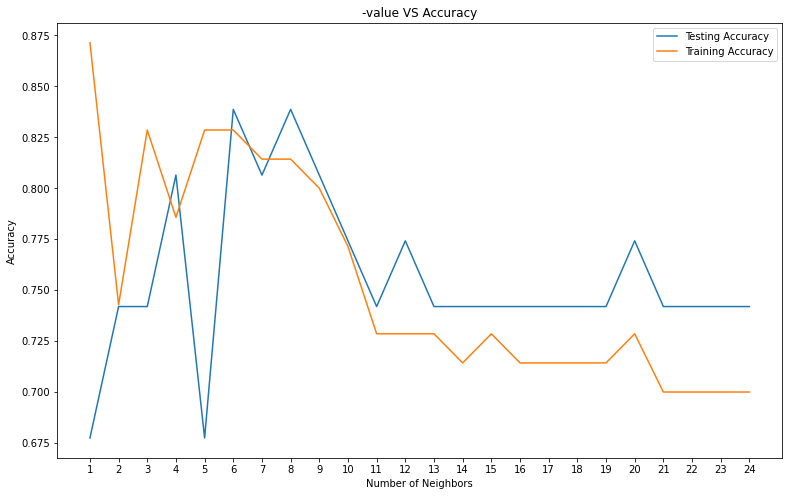

Best accuracy is 0.8387096774193549 with K = 6


In [254]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))